## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
# import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the dataset
student_df = pd.read_csv("students-data.csv", delimiter=";")

In [3]:
# Exploring first 5 elements of the dataset
student_df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [4]:
student_df['number']=student_df.index
student_df.set_index('number',inplace=True)

In [5]:
# Check the missing values in the data
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395 entries, 0 to 394
Data columns (total 33 columns):
school        395 non-null object
sex           395 non-null object
age           395 non-null int64
address       395 non-null object
famsize       395 non-null object
Pstatus       395 non-null object
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null object
Fjob          395 non-null object
reason        395 non-null object
guardian      395 non-null object
traveltime    395 non-null int64
studytime     395 non-null int64
failures      395 non-null int64
schoolsup     395 non-null object
famsup        395 non-null object
paid          395 non-null object
activities    395 non-null object
nursery       395 non-null object
higher        395 non-null object
internet      395 non-null object
romantic      395 non-null object
famrel        395 non-null int64
freetime      395 non-null int64
goout         395 non-null int64
Dalc          395 no

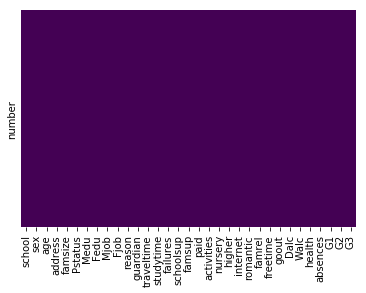

In [6]:
# Checking if there are null values using heatmap
sns.heatmap(student_df.isnull(),yticklabels=False,cbar=False,cmap ='viridis')

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [7]:
df_attributes = student_df.select_dtypes(exclude= ['int64'])

In [8]:
print(df_attributes.columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [9]:
student_df.var(axis=0)

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [10]:
student_df.drop(columns=["traveltime","studytime","failures","famrel","freetime","Dalc"],axis=1,inplace= True)

In [11]:
student_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'goout',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [12]:
#'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       #'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       #'nursery', 'higher', 'internet', 'romantic'

In [13]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
#le.fit_transform(student_df[['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob','reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities','nursery', 'higher', 'internet', 'romantic']])
#le.fit_transform(student_df[['school','sex', 'address', 'famsize']])
df_attributes = df_attributes.apply(le.fit_transform)

In [14]:
student_df.drop(['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'],axis=1,inplace=True)


In [15]:
#concatenate the numerical columns in dataframe to Label encoded categorical variables
student_df = pd.concat([student_df,df_attributes],axis=1)
student_df.head(5)

,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3,...,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,,,,,
0,18,4,4,4,1,3,6,5,6,6,...,0,1,1,0,0,0,1,1,0,0
1,17,1,1,3,1,3,4,5,5,6,...,0,0,0,1,0,0,0,1,1,0
2,15,1,1,2,3,3,10,7,8,10,...,2,1,1,0,1,0,1,1,1,0
3,15,4,2,2,1,5,2,15,14,15,...,1,1,0,1,1,1,1,1,1,1
4,16,3,3,2,2,5,4,6,10,10,...,1,0,0,1,1,0,1,1,0,0


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [18]:
student_df['G1']= np.where(student_df['G1']>=10,1,0)
student_df['G2']=np.where(student_df['G2']>=10,1,0)
student_df['G3']=np.where(student_df['G3']>=10,1,0)

## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [22]:
X = student_df[['G1','G2']]
y = student_df['G3']

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

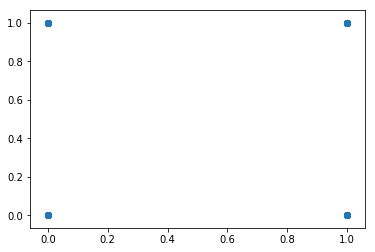

In [28]:
plt.scatter(x=student_df['G2'],y=student_df['G3'])


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

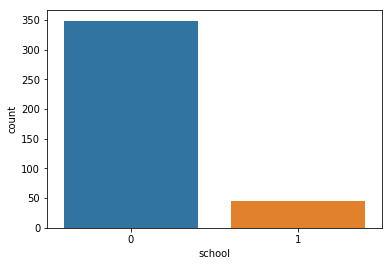

In [32]:
sns.countplot(x='school',data=student_df)

C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


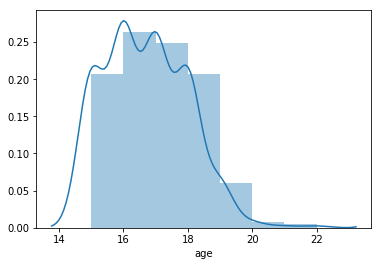

In [41]:
sns.distplot(student_df['age'],bins=7)

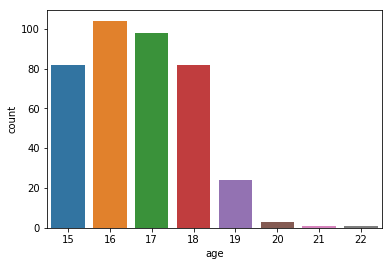

In [42]:
sns.countplot(x='age',data=student_df)

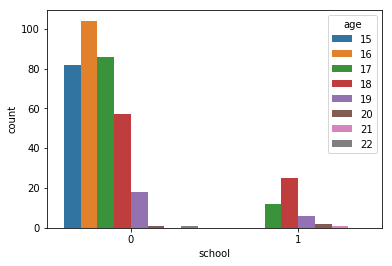

In [44]:
sns.countplot(x='school',hue='age',data=student_df)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(student_df.drop('G3',axis=1),student_df['G3'],train_size=300,test_size=95,random_state=100)

## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
#Run Logistic Regression on training dataset
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [56]:
#predictions
Predictions= logmodel.predict(X_test)
#Model Evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,Predictions))
print(confusion_matrix(y_test,Predictions))
print(logmodel.score(X_test,y_test))

             precision    recall  f1-score   support

          0       0.74      0.96      0.83        26
          1       0.98      0.87      0.92        69

avg / total       0.92      0.89      0.90        95

[[25  1]
 [ 9 60]]
0.8947368421052632


# Naive bayes with Iris data

### Import Iris.csv

In [57]:
Iris_df =pd.read_csv("Iris.csv")

In [58]:
Iris_df.head(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [59]:
X = Iris_df.iloc[:,0:4]
y= Iris_df['Class']

### Find the distribution of target variable (Class)

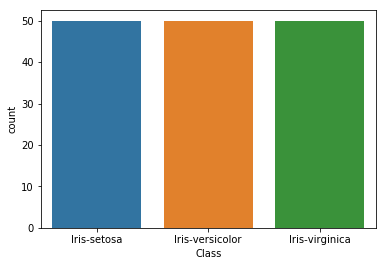

In [66]:
sns.countplot(x='Class',data=Iris_df)

### Plot the distribution of target variable using histogram

In [85]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
Iris_target = le.fit_transform(Iris_df["Class"])

In [95]:
Iris_target =pd.DataFrame(Iris_target)
Iris_target.columns = ['Class']

C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\jayshree.v\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


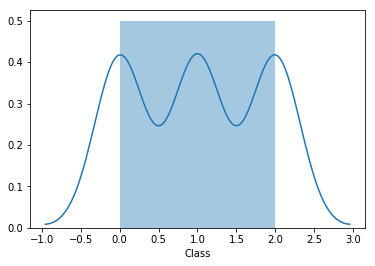

In [99]:
sns.distplot(Iris_target['Class'],hist=True)

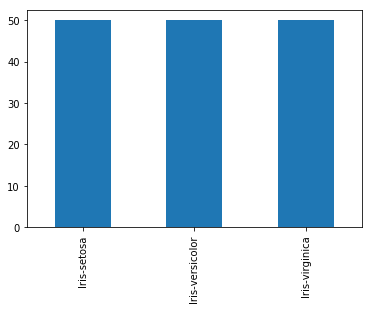

In [69]:
pd.value_counts(Iris_df["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

In [ ]:
plt.scatter(x=)

### Summary Statistics and explain insights for at least 2 variables

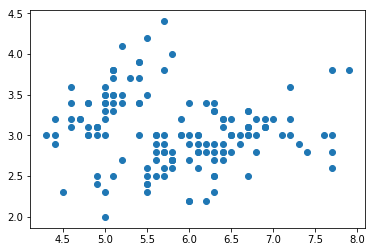

In [76]:
plt.scatter(x=Iris_df["Sepal Length (in cm)"],y= Iris_df["Sepal Width in (cm)"])

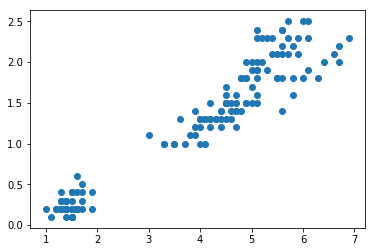

In [77]:
plt.scatter(x=Iris_df["Petal length (in cm)"],y= Iris_df["Petal width (in cm)"])

In [ ]:
#Inferences:
#1. Flowers with lesser Sepal Length has higher Sepal width
#2. Flowers with Sepal Length of less than 5.5 has Sepal width of less than or equal to 4.
#3. Flowers with Petal Lenth of less than 2 has a Petal Width of less than or equal to 0.6
#4. Flowers with higher Pertal Length has higher Petal Width

### Correlation among all variables and give your insights

In [78]:
Iris_df.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


In [ ]:
#1. Sepal Length and Petal Length have a stronger positive correlation
#2.Sepal Length and Petal Width have a stronger positive correlation
#3.Petal Lenth and Petal Width have a stronger psoitive Correlation

### Split data in Training and Validation in 80:20

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(Iris_df.drop('Class',axis=1),Iris_df['Class'],test_size=0.20,random_state=20)

### Do Feature Scaling

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

### Train and Fit NaiveBayes Model

In [107]:
from sklearn.naive_bayes import GaussianNB

In [111]:
#Create a Gausssian Classifier
gnb= GaussianNB()
#Train the model using Training dataset
gnb.fit(X_train,y_train)
#Predit the response for test dataset
y_pred= gnb.predict(X_test)
Expected = y_test

### Print Accuracy and Confusion Matrix and Conclude your findings

In [110]:
from sklearn import metrics

In [112]:
print(metrics.classification_report(Expected,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.91      0.91      0.91        11
 Iris-virginica       0.91      0.91      0.91        11

    avg / total       0.93      0.93      0.93        30



In [113]:
print(metrics.confusion_matrix(Expected,y_pred))

[[ 8  0  0]
 [ 0 10  1]
 [ 0  1 10]]


In [115]:
print("Accuracy:",metrics.accuracy_score(Expected, y_pred))

Accuracy: 0.9333333333333333
